# Tarea 1

** Paulina Martín, Uziel Linares**

**Envío del PR inicial: 24.08.2018** 

**Aceptación del PR: 02.09.2018** 

## 1

- Escriban una función `newton` que, a partir de `f`, `fprime` y `x0` dados, obtenga una de las raices de la ecuación. Comprueben que funciona con $f(x)=x^2 -2$ y $f'(x) = 2x$. Tengan suficiente cuidado para que no haya ningún tipo de inestabilidad de tipo en su función.

- Documenta la función de manera adecuada (*docstrings*).

- ¿Cómo se comporta, en términos del número de iterados, la convergencia del método de Newton?

In [6]:
Pkg.add("LaTeXStrings")

INFO: Cloning cache of LaTeXStrings from https://github.com/stevengj/LaTeXStrings.jl.git
INFO: Installing LaTeXStrings v1.0.2
INFO: Package database updated


In [8]:
using Plots
using LaTeXStrings

INFO: Precompiling module LaTeXStrings.


In [9]:
doc"""
    newton(f, f', x0, n_iter)
Devuelve las raíces de la función `f`.

"""
function newton(f, fprime, x0; n_iter::Int64=1000)
    
    x_nn = x_n = x0
    for i in 1:n_iter
        x_nn = x_n - (f(x_n) / fprime(x_n))
        x_n = x_nn
    end
    return float(x_nn)
end


newton

In [10]:
?newton

search:



```
newton(f, f', x0, n_iter)
```

Devuelve las raíces de la función `f`.


In [11]:
f(x) = x^2-2
fprime(x) = 2*x
x0 = 100000
iters = 10:50
raices = []
for n_iter in iters
    raiz = newton(f, fprime, x0, n_iter=n_iter)
    push!(raices, raiz)
end

INFO: Precompiling module GR.


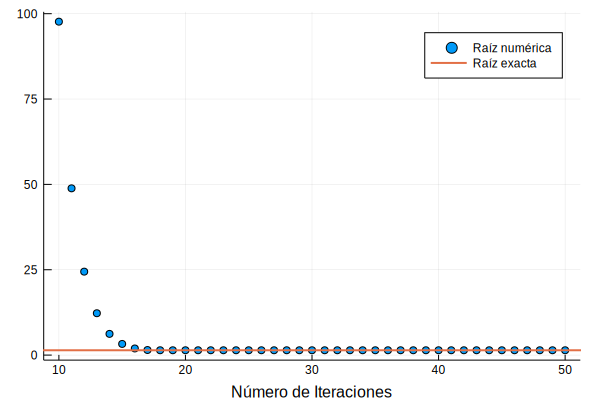

In [12]:
scatter(iters, raices, label="Raíz numérica", xlabel="Número de Iteraciones")
hline!([sqrt(2)], label="Raíz exacta", lw=2)

## 2

- Usando la función que hicieron en el ejercicio anterior y variando la condición inicial `x0`, de -3 a 3 con pasos suficientemente pequeños, por ejemplo `0.125`, grafiquen la dependencia de la raíz encontrada de la condición inicial para $f(x)=x^2-2$. Para hacer esto, vale la pena que guarden en un vector la raíz obtenida y en otro la condición inicial.

- Repitan el inciso anterior para $g(x) = (x-1)(x-2)(x-3)$, considerando el intervalo $x_0\in[1,3]$ y muchas condiciones iniciales.

In [13]:
cond_iniciales = -3:0.125:3
n_iter = 1000
raices = []
for x0 in cond_iniciales
    raiz = newton(f, fprime, x0, n_iter=n_iter)
    push!(raices, raiz)
end

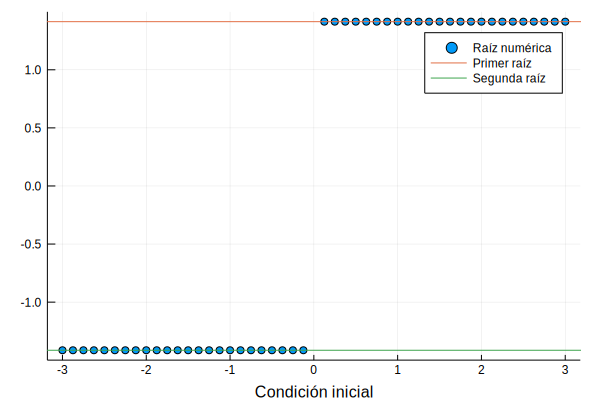

In [14]:
scatter(cond_iniciales, raices, label="Raíz numérica", xlabel="Condición inicial")
hline!([sqrt(2)], label="Primer raíz")
hline!([-sqrt(2)], label="Segunda raíz")

In [15]:
g(x) = (x - 1) * (x - 2) * (x - 3)
gprime(x) = 3*x^2 - 12*x + 11
n_iter = 1000
raices = []

cond_iniciales = 1:0.005:3
for x0 in cond_iniciales
    raiz = newton(g, gprime, x0, n_iter=n_iter)
    push!(raices, raiz)
end

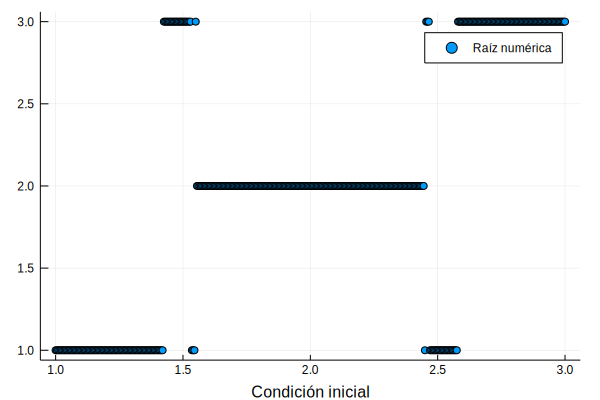

In [16]:
scatter(cond_iniciales, raices, label="Raíz numérica", xlabel="Condición inicial")

## 3

Considerando la función $h(z)=z^3-c$, con $z\in\mathbb{C}$ y $c=1$, utiliza el método de Newton para encontrar las raices en el plano complejo de dicha ecuación. Repite el ejercicio de la dependencia de la raíz encontrada de las condiciones iniciales, graficando en el plano de Argand.

In [21]:
h(z) = z^3 - 1
hprime(z) = 3*z^2

hprime (generic function with 1 method)

In [28]:
length([complex(i, j) for i in -10:10 for j in -10:10])

441

In [30]:
complex_range = [complex(i, j) for i in -10:10 for j in -10:10]
complex_roots = []
for complex in complex_range
    push!(complex_roots, newton(h, hprime, complex))
end

In [36]:
x_i = [real(c) for c in complex_range]
y_i = [imag(c) for c in complex_range]
x_r = [real(c) for c in complex_roots]
y_r = [imag(c) for c in complex_roots]

-0.8660254037844387

Cómo se grafica aquí?

## 4

- Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ de una variable (a priori arbitaria), en un punto $x_0$. Para esto, utilizaremos la aproximación de la derivada
que se basa en su definición:

$$ 
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} \equiv \frac{f(x_0+h)-f(x_0)}{h},
$$

lo que requiere de la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

- A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico respecto al valor *exacto*. Ilustren esto en una gráfica del error vs $h$, para $f(x) = 3x^3-2$, en $x_0=1$. 

In [30]:
function derivada_derecha(f::Function, x0::Real, h::Real=1e-6) 
    fprime = (f(x0 + h) - f(x0)) / h 
    return float(fprime)
end

derivada_derecha (generic function with 2 methods)

In [31]:
f(x) = 3*x^3 - 2
fprime(x) = 9*x^2
x0 = 1.
hs = 0.01:0.01:1
derivadas_derechas = [derivada_derecha(f, x0, h) for h in hs];
errores_derechas = abs.(derivadas_derechas .- fprime(x0));

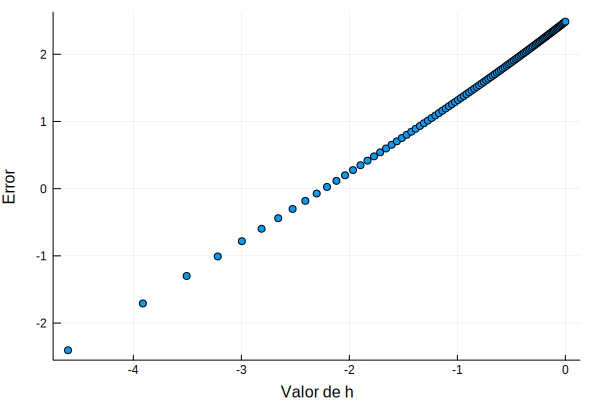

In [35]:
scatter(log.(hs), log.(errores_derechas), label="", xlabel="Valor de h", ylabel="Error")

## 5

- Repitan el ejercicio anterior (escribe una función `derivada_simetrica`, usando ahora la aproximación *simétrica* (respecto a la ocurrencia de $h$) de la derivada, dada por

$$
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
$$

- ¿Por qué es correcto afirmar que la derivada simétrica resulta en una mejor aproximación que la derivada derecha? Argumenten y si es necesario usen argumentos analíticos.

In [37]:
function derivada_simetrica(f::Function, x0::Real, h::Real=1e-6)
    fprime = (f(x0 + h) - f(x0 - h)) / (2*h)
    return fprime
end

derivada_simetrica (generic function with 4 methods)

In [38]:
f(x) = 3*x^3 - 2
fprime(x) = 9*x^2
x0 = 1.
hs = 0.01:0.01:1
derivadas_simetricas = [derivada_simetrica(f, x0, h) for h in hs];
errores_simetricas = abs.(derivadas_simetricas .- fprime(x0));

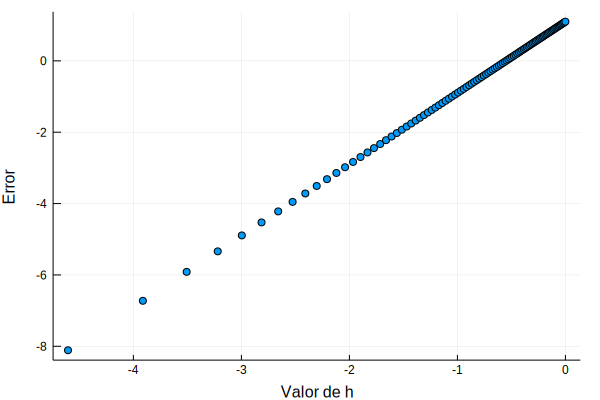

In [39]:
scatter(log.(hs), log.(errores_simetricas), label="", xlabel="Valor de h", ylabel="Error")

Veamos ahora de que forma se comparan ambos errores, para esto grafiquemos ambos errores en el mismo lugar.

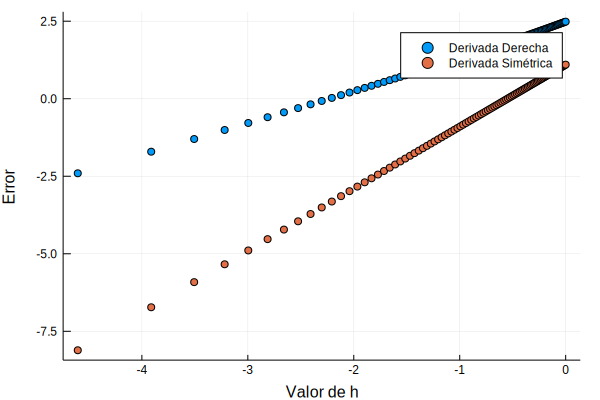

In [40]:
scatter(log.(hs), log.(errores_derechas), label="Derivada Derecha", xlabel="Valor de h", ylabel="Error")
scatter!(log.(hs), log.(errores_simetricas), label="Derivada Simétrica", xlabel="Valor de h", ylabel="Error")

Claramente la simétrica es mucho mejor!

## 6

- Definan la función `derivada_compleja` considerando la definición de la derivada dada por:
$$
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big),
$$
donde $\Im$ indica la parte imaginaria del argumento ($i=\sqrt{-1}$). 

- Argumenta (analíticamente) por qué esta definición da tan buen resultado. ¿Hay algún caso en que esta definición puede dar resultados inesperados?

In [135]:
function derivada_compleja(f::Function, x0, h=1e-6)
    z = (f(complex(x0, h))) / h
    return imag(z)
end

derivada_compleja (generic function with 2 methods)